In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read items
df_items = pd.read_csv('items.csv', delimiter='|')

#items first 5 rows
df_items.head(5)

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [3]:
#zip and create feature_3_frequency df
fea3_count = zip(df_items['feature_3'].value_counts().index, df_items['feature_3'].value_counts().values)
df_fea3_count = pd.DataFrame(fea3_count, columns=['fea', 'fre'])

#zip and create feature_5_frequency df
fea5_count = zip(df_items['feature_5'].value_counts().index, df_items['feature_5'].value_counts().values)
df_fea5_count = pd.DataFrame(fea5_count, columns=['fea', 'fre'])

#zip and create brand_frequency df
bra_count = zip(df_items['brand'].value_counts().index, df_items['brand'].value_counts().values)
df_bra_count = pd.DataFrame(bra_count, columns=['fea', 'fre'])

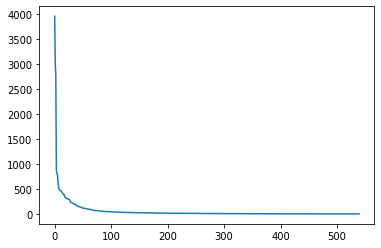

In [4]:
#plot frequency of feature_3
plt.plot(df_fea3_count['fre'].values)
plt.show()

In [5]:
#determine how many categories to retain for feature_3
df_fea3_count_r = df_fea3_count[df_fea3_count['fre']>450]
df_fea3_count_r.shape

(12, 2)

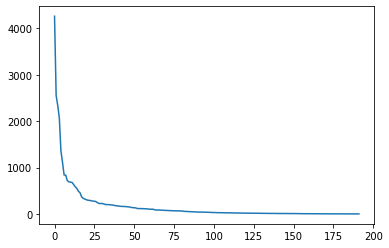

In [6]:
#plot frequency of feature_5
plt.plot(df_fea5_count['fre'].values)
plt.show()

In [7]:
#determine how many categories to retain for feature_5
df_fea5_count_r = df_fea5_count[df_fea5_count['fre']>650]
df_fea5_count_r.shape

(12, 2)

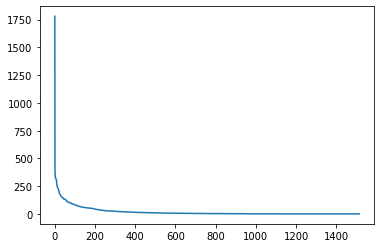

In [8]:
#plot frequency of brand
plt.plot(df_bra_count['fre'].values)
plt.show()

In [9]:
#determine how many categories to retain for brand
df_bra_count_r = df_bra_count[df_bra_count['fre']>265]
df_bra_count_r.shape

(10, 2)

In [10]:
#generate inrequent categories list for feature_3
df_fea3_count_d = df_fea3_count[df_fea3_count['fre']<450]
ls_f3 =df_fea3_count_d['fea'].values

#generate inrequent categories list for feature_
df_fea5_count_d = df_fea5_count[df_fea5_count['fre']<=650]
ls_f5 =df_fea5_count_d['fea'].values

#generate inrequent categories list for brand
df_bra_count_d = df_bra_count[df_bra_count['fre']<=265]
ls_bra =df_bra_count_d['fea'].values

In [11]:
#replace infrequent categories of featue_3 with others
df_items['feature_3'] = df_items['feature_3'].replace(ls_f3,1514)

#replace infrequent categories of featue_5 with mean
df_items['feature_5'] = df_items['feature_5'].replace(ls_f5,539)

#replace infrequent categories of brand with mean
df_items['brand'] = df_items['brand'].replace(ls_bra,191)

In [12]:
#display unique value number in brand
display(len(df_items['brand'].unique()))

#display unique value number in feature_3
display(len(df_items['feature_3'].unique()))

#display unique value number in features_5
display(len(df_items['feature_5'].unique()))

11

13

13

In [13]:
df_items.head(10)

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,191,4,0,1514,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,191,10,0,511,0,539,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,191,10,1,511,0,539,[3270]
4,8504,191,4,1,1514,0,66,[2470]
5,32122,191,4,1,491,0,66,NaN
6,31956,191,4,0,491,0,66,"[236, 3625, 356]"
7,6237,191,4,1,491,3,66,"[2658, 1686]"
8,16971,191,6,0,1514,0,45,"[390, 2678, 1708]"
9,18385,191,6,0,1514,0,45,"[390, 1708]"
